In [1]:
#housingデータ取得
import pandas as pd

df = pd.read_csv('./python-machine-learning-book-2nd-edition-master/code/ch10/housing.data.txt', header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
#サポートベクター回帰-GridSearch(linear,rbf)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

param_C= [1, 10.0, 100]
param_epsilon= [1, 2, 3, 4, 5]
param_grid = [{'kernel':['linear'], 'C':param_C, 'epsilon':param_epsilon}
#               {'kernel':['rbf'], 'C':param_range, 'epsilon':param_range, 'gamma':param_range}
             ]

gs = GridSearchCV(estimator=SVR(), param_grid=param_grid, cv=10, n_jobs=-1)
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

# y_train_pred = svr.predict(X_train)
# y_test_pred = svr.predict(X_test)

# print('MSE train: %.3f, test: %.3f' % (
#         mean_squared_error(y_train, y_train_pred),
#         mean_squared_error(y_test, y_test_pred)))
# print('R^2 train: %.3f, test: %.3f' % (
#         r2_score(y_train, y_train_pred),
#         r2_score(y_test, y_test_pred)))

# plt.scatter(y_train_pred,  
#             y_train_pred - y_train, 
#             c='steelblue',
#             edgecolor='white',
#             marker='o', 
#             s=35,
#             alpha=0.9,
#             label='training data')
# plt.scatter(y_test_pred,  
#             y_test_pred - y_test, 
#             c='limegreen',
#             edgecolor='white',
#             marker='s', 
#             s=35,
#             alpha=0.9,
#             label='test data')

# plt.xlabel('Predicted values')
# plt.ylabel('Residuals')
# plt.legend(loc='upper left')
# plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
# plt.xlim([-10, 50])
# plt.tight_layout()

# # plt.savefig('images/10_14.png', dpi=300)
# plt.show()

In [ ]:
#サポートベクター回帰(linear,rbf)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


svr = SVR(kernel='poly', C=1.0, epsilon=10, gamma=10.0)
svr.fit(X_train, y_train)

y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_14.png', dpi=300)
plt.show()

Train Data: mean=0.17 std=5.01
Test: mean=0.41 std=4.33


C:\Users\y-kobayashi\Anaconda3\envs\rein-env\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.00486176, 0.        , 0.        , 0.        , 0.        ,
        0.00972352, 0.00486176, 0.01458528, 0.00972352, 0.01944704,
        0.0243088 , 0.05347936, 0.0486176 , 0.06320287, 0.08751167,
        0.11668223, 0.13126751, 0.06806463, 0.0486176 , 0.03403232]),
 array([-19.39449635, -18.04129342, -16.68809048, -15.33488754,
        -13.9816846 , -12.62848166, -11.27527873,  -9.92207579,
         -8.56887285,  -7.21566991,  -5.86246698,  -4.50926404,
         -3.1560611 ,  -1.80285816,  -0.44965523,   0.90354771,
          2.25675065,   3.60995359,   4.96315653,   6.31635946,
          7.6695624 ]),
 <a list of 20 Patch objects>)

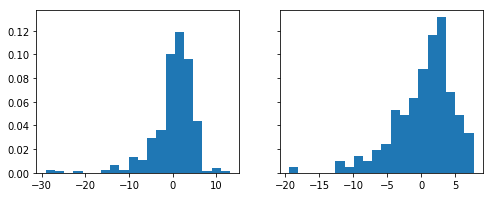

In [6]:
#残差のヒストグラム
train_x = y_train_pred
train_y = y_train_pred - y_train

test_x = y_test_pred
test_y = y_test_pred - y_test

print('Train Data: mean=%.2f std=%.2f' % (train_y.mean(), train_y.std()))
print('Test: mean=%.2f std=%.2f' % (test_y.mean(), test_y.std()))

fig, ax = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(8,3))
ax[0].hist(train_y, bins=20, normed=True)
ax[1].hist(test_y, bins=20, normed=True)